# Style Transfer Analysis

DSC160 Data Science and the Arts - Midterm Project Repository - Spring 2020

Project Team Members: 
- Nikolas Racelis-Russell, nracelis@ucsd.edu

## Abstract
Style transfer is a computer vision optimization problem in which a neural network recomposes an image in the style of another image. This means that one could re-imagine a famous historic picture, or even a meme - in the style of a famous artist's work like Van Gogh's "Starry Night." In fact, this Van Gogh style transfer is the example from which this project took its inspiration from.

This project used architectural art from [Zdzislaw's Beksinski's wiki art page](https://www.wikiart.org/en/zdislav-beksinski), specifically [untitled-14](https://www.wikiart.org/en/zdislav-beksinski/untitled-14). The goal was to transfer some of Beksinski's hellscapes to real life, and observe how that would manifest. 

This project closely followed the methods from [Leon A. Gatys, *et al.*'s paper, A Neural Algorithm of Artistic Style](https://arxiv.org/pdf/1508.06576.pdf), as well as used code from [Google Collab's Neural Style Transfer with tf.keras](https://colab.research.google.com/github/tensorflow/models/blob/master/research/nst_blogpost/4_Neural_Style_Transfer_with_Eager_Execution.ipynb#scrollTo=aDyGj8DmXCJI) to create and run the model using the [VGG19 CNN](https://keras.io/api/applications/vgg/#vgg19-function).

For the analysis aspect of the project, the content image that was recomposed using style transfer was measured for Hue, Saturation, Value (HSV) and [Pleasure, Dominance, and Arousal](https://dl.acm.org/doi/pdf/10.1145/1873951.1873965) (inspired from looking at [Group-14's project](https://github.com/ucsd-dsc-arts/dsc160-midterm-group13)).

## Methods

In [15]:
from skimage import data
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
import numpy as np

In [16]:
content_path = 'data/content_image.jpg'
style_path = 'data/style_image.jpg'
output_path = 'data/output_image.jpg'

In [28]:
def show_results(output_path, content_path, style_path, show_large_final=True):
    plt.figure(figsize=(10, 5))
    content = io.imread(content_path) 
    style = io.imread(style_path)
    output = io.imread(output_path)

    plt.subplot(1, 2, 1)
    plt.imshow(content)

    plt.subplot(1, 2, 2)
    plt.imshow(style)

    if show_large_final: 
        plt.figure(figsize=(10, 10))

        plt.imshow(output)
        plt.title('Output Image')
        plt.show()

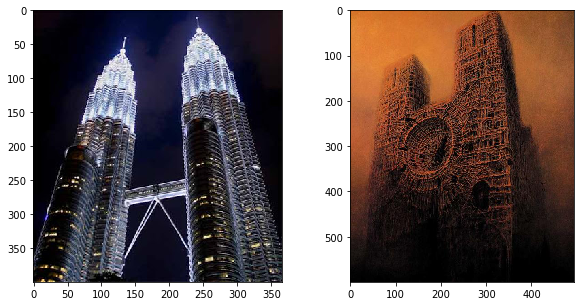

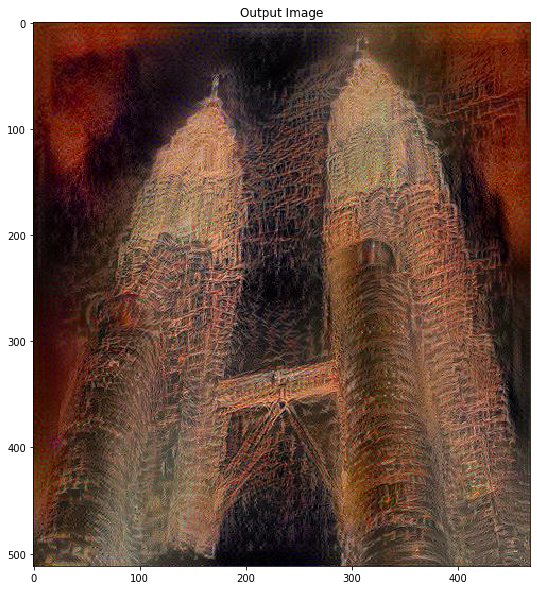

In [29]:
show_results(output_path, content_path, style_path)

In [30]:
content_img = io.imread(content_path)
style_img = io.imread(style_path)
output_img = io.imread(output_path)

In [37]:
def rgb2hsv_vals(img_path):
    '''
    Takes image path and returns hsv values for rgb image
    '''
    rgb_img = io.imread(img_path)
    hsv_img = rgb2hsv(rgb_img)
    
    hue_img = hsv_img[:, :, 0]
    saturation_img = hsv_img[:,:, 1]
    value_img = hsv_img[:, :, 2]
    
    return hue_img, saturation_img, value_img

In [38]:
# separate into hsv
content_hue, content_saturation, content_value = rgb2hsv_vals(content_path)
style_hue, style_saturation, style_value = rgb2hsv_vals(style_path)
output_hue, output_saturation, output_value = rgb2hsv_vals(output_path)

In [39]:
def display_hsv(rgb_img, hue_img, saturation_img, value_img):
    '''
    Display rgb img with hsv channels
    '''
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 8))

    ax0.imshow(rgb_img)
    ax0.set_title("RGB image")
    ax0.axis('off')
    ax1.imshow(hue_img, cmap='hsv')
    ax1.set_title("Hue channel (H)")
    ax1.axis('off')
    ax2.imshow(saturation_img)
    ax2.set_title("Saturation channel (S)")
    ax2.axis('off')
    ax3.imshow(value_img)
    ax3.set_title("Value channel (V)")
    ax3.axis('off')

    fig.tight_layout()

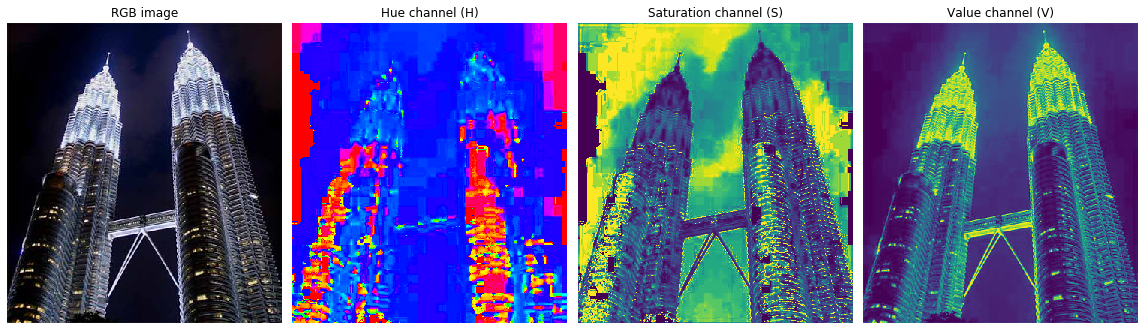

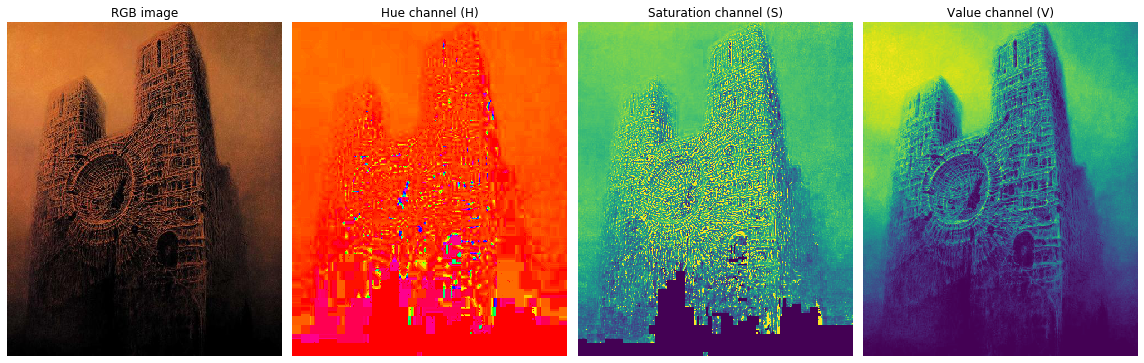

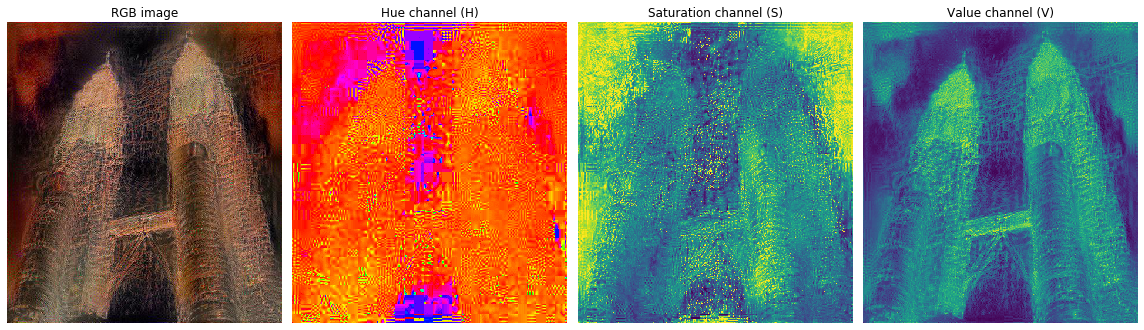

In [40]:
display_hsv(content_img, content_hue, content_saturation, content_value)
display_hsv(style_img, style_hue, style_saturation, style_value)
display_hsv(output_img, output_hue, output_saturation, output_value)

In [41]:
def calculate_pad(img_saturation, img_value):
    mean_saturation = np.mean(img_saturation, axis=(0,1))
    mean_value = np.mean(img_value, axis=(0,1))
    
    img_pleasure = 0.69*mean_value + 0.22*mean_saturation
    img_arousal = -0.31*mean_value + 0.6*mean_saturation
    img_dominance = 0.76*mean_value + 0.32*mean_saturation
    
    return [img_pleasure, img_arousal, img_dominance]

In [42]:
content_pad = calculate_pad(content_saturation, content_value)
style_pad = calculate_pad(style_saturation, style_value)
output_pad = calculate_pad(output_saturation, output_value)

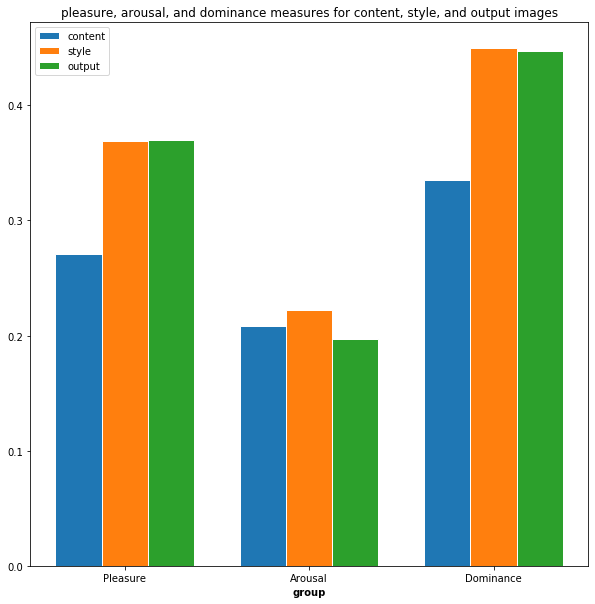

In [43]:
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 10))

plt.bar(r1, content_pad, width=barWidth, edgecolor='white', label='content')
plt.bar(r2, style_pad, width=barWidth, edgecolor='white', label='style')
plt.bar(r3, output_pad, width=barWidth, edgecolor='white', label='output')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(3)], ['Pleasure', 'Arousal', 'Dominance'])
 
# Create legend & Show graphic

plt.legend()
plt.title('pleasure, arousal, and dominance measures for content, style, and output images')
plt.show()

In [44]:
def calculate_mean_hsv(img_path):
    hue, saturation, value = rgb2hsv_vals(img_path)
    
    mean_hue = np.mean(hue, axis=(0,1))
    mean_saturation = np.mean(saturation, axis=(0,1))
    mean_value = np.mean(value, axis=(0,1))
    return [mean_hue, mean_saturation, mean_value]

content_mean_hsv = calculate_mean_hsv(content_path)
style_mean_hsv = calculate_mean_hsv(style_path)
output_mean_hsv = calculate_mean_hsv(output_path)

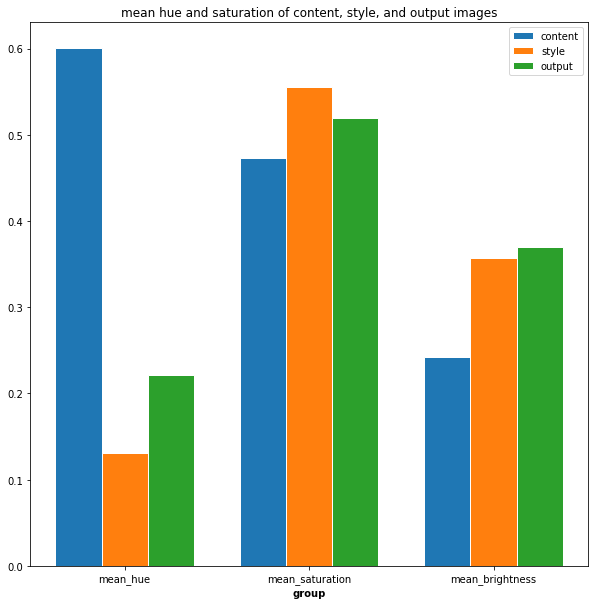

In [54]:
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 10))

plt.bar(r1, content_mean_hsv, width=barWidth, edgecolor='white', label='content')
plt.bar(r2, style_mean_hsv, width=barWidth, edgecolor='white', label='style')
plt.bar(r3, output_mean_hsv, width=barWidth, edgecolor='white', label='output')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(3)], ['mean_hue', 'mean_saturation', 'mean_brightness'])
 
# Create legend & Show graphic

plt.legend()
plt.title('mean hue and saturation of content, style, and output images')
plt.show()

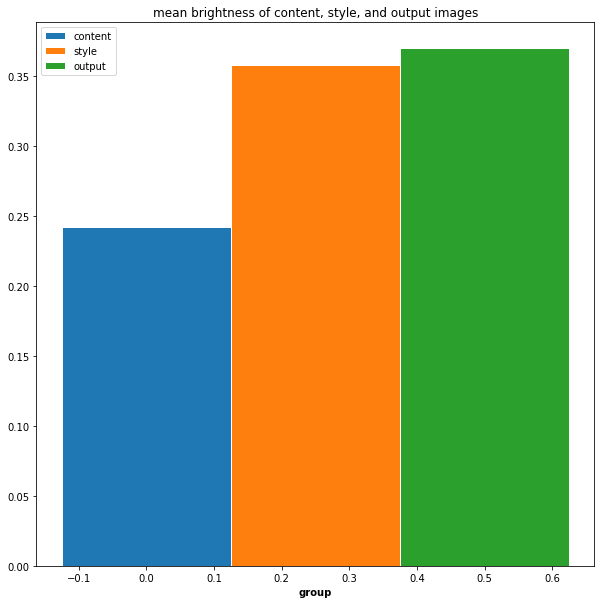

In [53]:
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(1)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 10))

plt.bar(r1, content_mean_hsv[2], width=barWidth, edgecolor='white', label='content')
plt.bar(r2, style_mean_hsv[2], width=barWidth, edgecolor='white', label='style')
plt.bar(r3, output_mean_hsv[2], width=barWidth, edgecolor='white', label='output')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
 
# Create legend & Show graphic

plt.legend()
plt.title('mean brightness of content, style, and output images')
plt.show()

In [109]:
style_mean_hsv

[0.13005275, 0.54843575, 91.19999]

In [ ]:
output_mean